# The Kolmogorov-Arnold Network (KAN) 

[The Kolmogorov-Arnold Network (KAN)](http://https://arxiv.org/pdf/2404.19756) is a brand-new class of Neural Network building block. It aims to be more expressive, less prone to overfitting and more interpretable than the Multi-Layer Perceptron (MLP).

MLPS the building block of all neural networks used today, though have some shortcomings, like hight likelihood of overfitting,and long time to train.

The Kolmogorov-Arnold Representation Theorem is similar in goal to the Universal Approximation theorem that underpins MLPs, but has a different premise. It essentially states that any multivariate function can be represented with addition of 1-dimensional non-linear functions. 

 In MLPs, the non-linear functions are fixed and never change at any point during training. In KANs, there are no more weight matrices or biases, just 1-dimensional non-linearities fitted to the data. These non-linearities are then added together. We can then stack more and more layers to create more complex functions.

However, in KANs these non linearities are not the ones like in MLPs, the ReLU function and all, rather they are represented as splines, used in the field of computer graphics. They are basically piecewise polynomials.

KANs uses B-splines, a type of spline which has the property of being both local (moving a point does not affect the overall shape of the curve), and have matching second derivatives (also called C2 continuity). This comes at the cost of not actually passing through the points (except at the end points).This gives us some space for noise specially in case of modelling physics problems.
 
 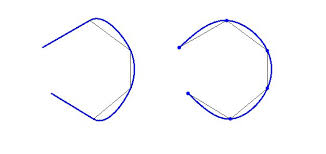
 
 As we can see the curve does not pass through the points except for the extreme ones.


**Working**

We need order of n-1 polynomial to properly interpolate n data points, however this may not always be smooth.Splines tackle this issue by fitting piecewise polynomial functions to sections between data points.

We have a piecewise parametric curve on each edge of the computational graph. At each node, these get summed.

To train such a model, standard backpropagation can be used. In this case the authors use LBFGS, which is a second-order optimisation method (compared to Adam which is first-order). The authors used a basis function b(x) (similar to residual connections) such that the activation function ϕ(x) is the sum of the basis function b(x) and the spline function:

**ϕ(x) = w (b(x) + spline(x))**

And

**b(x) = silu(x) = x/(1 + exp(−x))**, used to add non linearity

spline(x) is parametrized as a linear combination of B-splines such that

**spline(x) = Sum(ciBi(x))**
where cis are trainable. The w factor was included to better control the overall magnitude of the activation function.

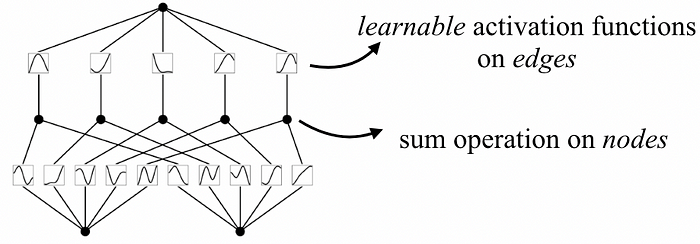

# Implementation

**Implementing a singularity(using the examples given in github repo
f(x,y)=sin(log(x)+log(y)) (x>0,y>0)**

Github repo(of the authors for the requirements.txt file)

In [1]:
!python -m venv pykan-env
!pykan-env\Scripts\activate 
!pip install pykan

In [2]:
!pip install -r requirements.txt


  You can safely remove it manually.


  You can safely remove it manually.


  You can safely remove it manually.

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.

qiskit-ibmq-provider 0.20.2 requires numpy<1.24, but you have numpy 1.24.4 which is incompatible.

qiskit-ibm-runtime 0.9.1 requires numpy<1.24, but you have numpy 1.24.4 which is incompatible.

tensorflow-intel 2.12.0 requires numpy<1.24,>=1.22, but you have numpy 1.24.4 which is incompatible.

torchvision 0.15.2 requires torch==2.0.1, but you have torch 2.2.2 which is incompatible.















     ---------------------------------------- 0.0/57.6 kB ? eta -:--:--

     ---------------------------------------- 57.6/57.6 kB 3.0 MB/s eta 0:00:00























   ---------------------------------------- 0.0/7.2 MB ? eta -:--:--

   -- ------------------------------------- 0.4/7.2 MB 11.8 MB/s eta 0:00:01

   ------ --------------------------------- 1.2/7.2 MB 12.4 MB/s eta 0:00:01

   ---------- ----------------------------- 1.9/7.2 MB 13.1 MB/s eta 0:00:01

   ----------- ---------------------------- 2.0/7.2 MB 12.8 MB/s eta 0:00:01

   ----------- ---------------------------- 2.0/7.2 MB 12.8 MB/s eta 0:00:01

   ------------ --------------------------- 2.2/7.2 MB 8.4 MB/s eta 0:00:01

   --------------- ------------------------ 2.8/7.2 MB 8.8 MB/s eta 0:00:01

   ----------------- ---------------------- 3.1/7.2 MB 9.0 MB/s eta 0:00:01

   ------------------ --------------------- 3.4/7.2 MB 8.6 MB/s eta 0:00:01

   ------------------- --------------------

In [3]:
from kan import *



In [4]:
import torch



In [26]:
# create a KAN: 2D inputs, 1D output, and 5 hidden neurons. cubic spline (k=3), 5 grid intervals (grid=5).
model = KAN(width=[2,5,1], grid=20, k=3, seed=0)
f = lambda x: torch.sin(2*(torch.log(x[:,[0]])+torch.log(x[:,[1]])))
dataset = create_dataset(f, n_var=2, ranges=[0.2,5])

# train the model


dataset["train_input"].shape, dataset["train_label"].shape

(torch.Size([1000, 2]), torch.Size([1000, 1]))

In [ ]:
#print(dataset)

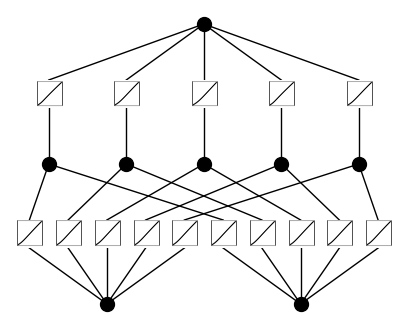

In [28]:
model(dataset["train_input"])
model.plot(beta=100)

In [29]:
model.train(dataset, opt="LBFGS", steps=20);

train loss: 5.89e-03 | test loss: 3.30e-02 | reg: 1.34e+01 : 100%|██| 20/20 [00:09<00:00,  2.02it/s]


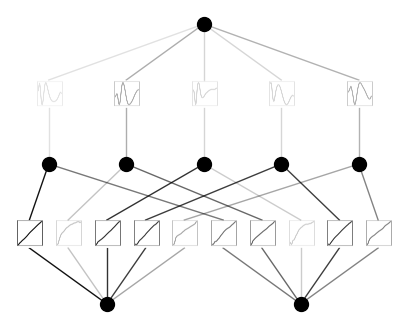

In [30]:
model = model.prune()
model(dataset["train_input"])
model.plot()

In [24]:
model.fix_symbolic(0,0,0,'log')
model.fix_symbolic(0,1,0,'log')
model.fix_symbolic(1,0,0,'sin')

r2 is 0.9998219609260559

r2 is 0.999824047088623

r2 is 0.9996951222419739


tensor(0.9997, grad_fn=<SelectBackward0>)

In [25]:
model.symbolic_formula()[0][0]

1.0*sin(2.01*log(0.39*x_2) + 2.01*log(2.57*x_1 + 0.02) + 6.24)